In [1]:
from openai import OpenAI
import pandas as pd

client = OpenAI(
    # defaults to os.environ.get("OPENAI_API_KEY")
    api_key="", #updated on 03132024
)

def answer(prompt):
    response = client.chat.completions.create(
        model="gpt-4o-2024-08-06",
        messages=[{"role": "user", "content": prompt}],
        temperature = 0
    )
    return response.choices[0].message.content.strip()

In [2]:
codebook = '''The definition below is to be followed when classifying tweets into the following four categories: positive, coded as 1; negative, coded as 2; neutral, coded as 3; and a combination of 1 and 2, which should be coded as 4. 

It is important to note that each tweet be classified into only one category. When coding a tweet that contains any URL, classification decisions are to be based solely on the content of the tweet itself, and therefore it is neither necessary nor desirable to check the content linked to by any URL.

Detailed definitions of the categories are provided below.

Category	Definition
Positive (1)	A tweet coded as positive should express positive, favorable, or supportive attitude(s) toward cultured meat, regardless of whether this represents the tweet author’s own attitude(s), the attitude(s) of any other cited source(s), or both. This might be by:
i)	articulating one or more advantages /benefits of cultured meat and/or materials required to make cultured meat (e.g., “low-cost, edible, and highly customizable scaffolds”, “growth serum”), such as animal welfare (e.g., mentioning that it will reduce the need for livestock farming), non-use of animals or animal components (e.g., mentioning that there are no animals involved), and lessened environmental impact (e.g., stating that it is more sustainable or results in less greenhouse-gas emission);
ii)	expressing willingness to buy or try cultured meat after it becomes commercially available, without mentioning any concern;
iii)	sharing any research finding and/or survey result that consumers are willing to try cultured meat;
iv)	expressing support for or any positive expectation about cultured meat or related research (e.g., revealing a belief that the market for cultured meat will likely increase in size and/or that the prices of cultured meat companies’ and/or other relevant stocks will likely rise), or events such as conferences or TED talks (although if a tweet is merely introducing a study or event without expressing any positive expectation or support, it should be coded as neutral not positive);
v)	defending the cultured-meat industry or its products against critics and skeptics;
vi)	expressing support for any person, organization, or other entity that advocates cultured meat (provided that such advocacy is mentioned in the tweet);
vii)	showing disapproval of any person, entity, or organization that takes a stance against cultured meat (provided that such stance is mentioned in the tweet);
viii)	sharing the content and/or title(s) of news, articles, videos, announcements, or activities in the tweet itself (as opposed to revealing them via URLs) that show one or more advantages of cultured meat, without stating one’s own stance toward it (though if the tweet is only expressing any opinion toward the articles or videos, announcements, or activities themselves instead of toward cultured meat, it should not be coded as positive: e.g., “interesting article”); and/or
ix)	sharing the content and/or title(s) of news, articles, videos, announcements, or activities in the tweet itself (as opposed to revealing them via URLs) that show one or more disadvantages of cultured meat, while the tweet author expresses disagreement with such material and/or expresses any positive, favorable, or supportive attitude toward cultured meat.
Negative (2)	A tweet coded as negative should express negative, unfavorable, or attacking attitude(s) toward cultured meat, regardless of whether this represents the tweet author’s own attitude(s), the attitude(s) of any other cited source(s), or both. This might be by:
i)	expressing any doubt, skepticism, and/or negative expectation about cultured meat, such as that it is not real meat or not as good as real meat, about its feasibility (e.g., remains a distant dream, requires a lot of funding to develop, that its market will likely shrink, and/or that cultured meat companies’ and/or other relevant stocks will likely fall in price), and/or using “soylent green” and/or “Frankenmeat” to refer to it
(Note: the phrase “soylent green” has become a popular cultural reference to any food or product that is suspected to be made from questionable or unethical sources whereas “Frankenmeat” has been used to describe meat products that are produced using biotechnology, genetic engineering, or other modern scientific methods. It is often used in a negative context, suggesting that these methods create unnatural or unhealthy meat products);
ii)	showing any concern about cultured meat, e.g., expressing hope that it will become more affordable, fear that it will be unsafe, and/or concerns that it will not taste good or right;
iii)	suggesting that cultured meat is not necessary;
iv)	expressing unwillingness to try or purchase cultured-meat products;
v)	expressing thoughts about cultured meat being a tool for rich people or corporations to make money;
vi)	showing disapproval of any person, entity, or organization that advocates cultured meat (provided that such advocacy is mentioned in the tweet);
vii)	expressing support for any person, organization, or other entity that takes a stance against cultured meat (provided that such stance is mentioned in the tweet);
viii)	sharing the content and/or title(s) of news, articles, videos, announcements, or activities in the tweet itself (as opposed to revealing them via URLs) that show one or more disadvantages of cultured meat, without stating one’s own stance toward it; and/or
ix)	sharing the content and/or title(s) of news, articles, videos, announcements, or activities in the tweet itself (as opposed to revealing them via URLs) that show one or more advantages of cultured meat, while the tweet author expresses disagreement with such material and/or expresses any negative, unfavorable, or attacking attitude toward cultured meat.
Neutral (3)	A tweet coded as neutral should express no sentiment toward cultured meat, either the tweet author’s own or that of any other cited source(s). This might be by:
i)	asking one or more questions about cultured meat without expressing any attitude (though question marks may pertain to rhetorical questions, which should not automatically be treated as questions); and/or
ii)	sharing the content and/or title(s) of news, articles, videos, announcements, or activities in the tweet itself (as opposed to revealing them via URLs) that express no advantages or shortcomings of cultured meat (e.g., if a tweet is only sharing news about fundraising/investment/legislation such as “Singapore approved cultured meat for sale” or “Cultured meat cleared for human consumption by U.S. regulator”), and without mentioning one’s own attitude(s).
Combination (4) 	A tweet coded as a combination of the above positive and negative categories should express both positive and negative attitudes toward cultured meat, regardless of whether these represent the tweet author’s own attitude(s), the attitude(s) of any other cited references, or both. This might be by:
i)	expressing multiple sentiments that, as stand-alone tweets, would have been coded in both the ‘positive (1)’ and ‘negative (2)’ categories (which may sometimes coexist using transition words like “but”); and/or
ii)	showing willingness to try or purchase cultured meat only under certain circumstances (e.g., when it becomes more affordable or more nutritious).
'''

In [3]:
def feed(i,df):
    text = (
    "Here is a codebook that will guide your sentiment analysis of tweets about cultured meat: " + codebook + "\n"+"Perform sentiment analysis on the following tweet: "+ df['Tweet'][i] + '\n'+'Return your response only as one of the four coding numbers indicated in the codebook.')
    return text

In [4]:
import pandas as pd
Paris_1 = pd.read_csv('Coding_Paris_Week1.csv')
Paris_2 = pd.read_csv('Coding_Paris_Week2.csv')
Paris_3 = pd.read_csv('Coding_Paris_Week3.csv')
Paris_4 = pd.read_csv('Coding_Paris_Week4.csv')
Paris_5 = pd.read_csv('Coding_Paris_Week5.csv')
Shawn_1 = pd.read_csv('Coding_Shawn_Week1.csv')
Shawn_2 = pd.read_csv('Coding_Shawn_Week2.csv')
Shawn_3 = pd.read_csv('Coding_Shawn_Week3.csv')
Shawn_4 = pd.read_csv('Coding_Shawn_Week4.csv')
Shawn_5 = pd.read_csv('Coding_Shawn_Week5.csv')
Tianli_1 = pd.read_csv('Coding_Tianli_Week1.csv')
Tianli_2 = pd.read_csv('Coding_Tianli_Week2.csv')
Tianli_3 = pd.read_csv('Coding_Tianli_Week3.csv')
Tianli_4 = pd.read_csv('Coding_Tianli_Week4.csv')
Tianli_5 = pd.read_csv('Coding_Tianli_Week5.csv')
# Combine all the data frames into one
combined_df = pd.concat([
    Paris_1, Paris_2, Paris_3, Paris_4, Paris_5,
    Shawn_1, Shawn_2, Shawn_3, Shawn_4, Shawn_5,
    Tianli_1, Tianli_2, Tianli_3, Tianli_4, Tianli_5
], ignore_index=True)

combined_df['Sentiment'] = combined_df['Sentiment'].astype(int)

An example of actual prompt:

In [5]:
print(feed(1,combined_df))

Here is a codebook that will guide your sentiment analysis of tweets about cultured meat: The definition below is to be followed when classifying tweets into the following four categories: positive, coded as 1; negative, coded as 2; neutral, coded as 3; and a combination of 1 and 2, which should be coded as 4. 

It is important to note that each tweet be classified into only one category. When coding a tweet that contains any URL, classification decisions are to be based solely on the content of the tweet itself, and therefore it is neither necessary nor desirable to check the content linked to by any URL.

Detailed definitions of the categories are provided below.

Category	Definition
Positive (1)	A tweet coded as positive should express positive, favorable, or supportive attitude(s) toward cultured meat, regardless of whether this represents the tweet author’s own attitude(s), the attitude(s) of any other cited source(s), or both. This might be by:
i)	articulating one or more advanta

In [6]:
train_df = combined_df.sample(frac=0.8, random_state=2024)

# remaining 20% as validation set
validation_df = combined_df.drop(train_df.index)

In [7]:
validation_df = validation_df.reset_index(drop=True)

In [4]:
validation_df = pd.read_csv('GPT-4o_withcodebook_241031_Myprompt.csv')
validation_df

,Unnamed: 0,Tweet,Sentiment,GPT-4o,Sentiment_number
0,0,@csimpsyo @Tbogin @jonlovett Cultured meat,3,3,3
1,1,RT @ndonyourtable What's the difference betwee...,3,3,3
2,2,#Technology #Tech Lab-Grown Meat Is Coming htt...,3,3,3
3,3,This year is the first time cultivated meat ha...,3,3,3
4,4,"RT @NewHarvestOrg 🍗and @UmaValeti, who co-foun...",3,3,3
...,...,...,...,...,...
4590,4590,@Joseph_Plant What goes into lab grown meat? I...,2,2,2
4591,4591,Google Funding Lab Grown Meat… No Animals Kill...,1,1,1
4592,4592,RT @Orbyne #LSEForum cultured meat avoids the ...,1,1,1
4593,4593,@MusadADroid @AuthorGusPegel The answer would ...,4,1,1


In [8]:
import time
sentiment = []
start = time.time()
count = 0
for i, v in validation_df.iterrows():
    sentiment.append(answer(feed(i,validation_df)))
    #time.sleep(15)
time_used = time.time()-start

In [15]:
time_used/4595

0.4358478857461724

In [16]:
len(sentiment)

4595

In [17]:
sentiment

['3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '2',
 '3',
 '1',
 '3',
 '3',
 '1',
 '3',
 '1',
 '2',
 '1',
 '3',
 '3',
 '1',
 '3',
 '3',
 '3',
 '3',
 '2',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '1',
 '1',
 '3',
 '2',
 '3',
 '4',
 '2',
 '2',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '2',
 '3',
 '3',
 '3',
 '2',
 '2',
 '2',
 '4',
 '3',
 '2',
 '1',
 '3',
 '3',
 '3',
 '2',
 '3',
 '3',
 '4',
 '4',
 '2',
 '3',
 '3',
 '3',
 '2',
 '2',
 '1',
 '3',
 '3',
 '4',
 '2',
 '2',
 '3',
 '3',
 '1',
 '2',
 '1',
 '1',
 '3',
 '1',
 '3',
 '2',
 '2',
 '3',
 '3',
 '3',
 '3',
 '2',
 '3',
 '4',
 '1',
 '3',
 '1',
 '3',
 '4',
 '2',
 '3',
 '2',
 '3',
 '3',
 '3',
 '3',
 '3',
 '1',
 '1',
 '3',
 '3',
 '3',
 '1',
 '3',
 '3',
 '1',
 '1',
 '2',
 '3',
 '3',
 '2',
 '1',
 '3',
 '3',
 '3',
 '1',
 '3',
 '3',
 '3',
 '1',
 '2',
 '3',
 '3',
 '3',
 '2',
 '3',
 '3',
 '3',
 '3',
 '1',
 '3',
 '3',
 '3',
 '2',
 '1',
 '3',
 '2',
 '4',
 '3',
 '2',
 '3',
 '2',
 '3',
 '1',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3'

In [9]:
validation_df['GPT-4o_3'] = [i for i in sentiment]

In [7]:
validation_df

,Unnamed: 0,Tweet,Sentiment,GPT-4o,Sentiment_number,GPT-4o_2
0,0,@csimpsyo @Tbogin @jonlovett Cultured meat,3,3,3,3
1,1,RT @ndonyourtable What's the difference betwee...,3,3,3,3
2,2,#Technology #Tech Lab-Grown Meat Is Coming htt...,3,3,3,3
3,3,This year is the first time cultivated meat ha...,3,3,3,3
4,4,"RT @NewHarvestOrg 🍗and @UmaValeti, who co-foun...",3,3,3,3
...,...,...,...,...,...,...
4590,4590,@Joseph_Plant What goes into lab grown meat? I...,2,2,2,2
4591,4591,Google Funding Lab Grown Meat… No Animals Kill...,1,1,1,1
4592,4592,RT @Orbyne #LSEForum cultured meat avoids the ...,1,1,1,1
4593,4593,@MusadADroid @AuthorGusPegel The answer would ...,4,1,1,1


In [13]:
validation_df['Sentiment_number'] = validation_df['GPT-4o'].fillna(0).astype(int)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(validation_df['Sentiment'], validation_df['Sentiment_number'])
precision = precision_score(validation_df['Sentiment'], validation_df['Sentiment_number'], average='weighted')
recall = recall_score(validation_df['Sentiment'], validation_df['Sentiment_number'], average='weighted')
f1 = f1_score(validation_df['Sentiment'], validation_df['Sentiment_number'], average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7573449401523396
Precision: 0.789703311744499
Recall: 0.7573449401523396
F1 Score: 0.7664546290593397


In [11]:
validation_df['Sentiment_number'] = validation_df['GPT-4o_2'].fillna(0).astype(int)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(validation_df['Sentiment'], validation_df['Sentiment_number'])
precision = precision_score(validation_df['Sentiment'], validation_df['Sentiment_number'], average='weighted')
recall = recall_score(validation_df['Sentiment'], validation_df['Sentiment_number'], average='weighted')
f1 = f1_score(validation_df['Sentiment'], validation_df['Sentiment_number'], average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7577801958650707
Precision: 0.7909467154029615
Recall: 0.7577801958650707
F1 Score: 0.7669588399070434


In [12]:
validation_df['Sentiment_number'] = validation_df['GPT-4o_3'].fillna(0).astype(int)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(validation_df['Sentiment'], validation_df['Sentiment_number'])
precision = precision_score(validation_df['Sentiment'], validation_df['Sentiment_number'], average='weighted')
recall = recall_score(validation_df['Sentiment'], validation_df['Sentiment_number'], average='weighted')
f1 = f1_score(validation_df['Sentiment'], validation_df['Sentiment_number'], average='weighted')

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.7569096844396083
Precision: 0.7924103937112958
Recall: 0.7569096844396083
F1 Score: 0.7666779280116955


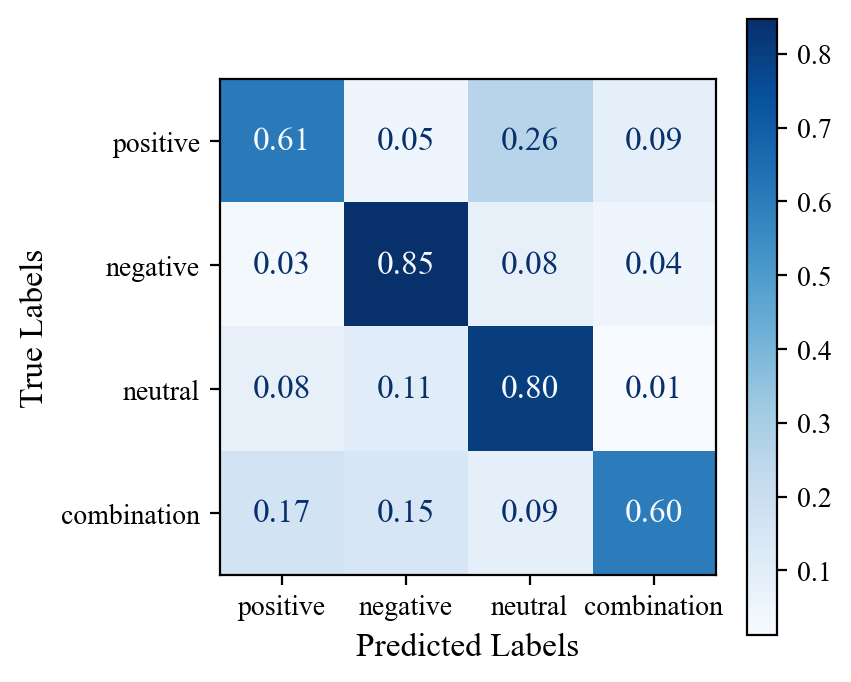

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define a mapping of numeric labels to sentiment labels
label_mapping = {0: 'positive', 1: 'negative', 2: 'neutral', 3: 'combination'}
sentiment_labels = [label_mapping[i] for i in range(4)]  # List of sentiment labels in order

# Generate the normalized confusion matrix by rows
conf_matrix = confusion_matrix(
    validation_df['Sentiment'], 
    validation_df['GPT-4o_3'], 
    normalize='true'
)

# Create a ConfusionMatrixDisplay object for visualization, with customized labels
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=sentiment_labels)

# Plot the confusion matrix
plt.rc('font', family='Times New Roman')  # Set the font to Times New Roman
fig, ax = plt.subplots(figsize=(4, 4), dpi=200)  # Increase figure size and resolution
disp.plot(cmap='Blues', ax=ax, values_format=".2f")  # Format numbers as percentages with two decimals

# Customize the text size of numbers in the matrix
for text in disp.text_.ravel():
    text.set_fontsize(12)  # Increase font size of numbers in the matrix

# Set titles and labels with the desired font
plt.xlabel("Predicted Labels", fontname='Times New Roman', fontsize=12)
plt.ylabel("True Labels", fontname='Times New Roman', fontsize=12)
plt.show()